In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from scipy import io
from tqdm.auto import tqdm

pipreqs  ./
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in ./requirements.txt


In [10]:
# Implementierung der DFT wie in Gleichung 3.4
def myDFT(f):
    N = len(f)
    F = np.zeros(N,dtype=complex)
    roots = np.array([np.exp(-2*np.pi*1j*n/N) for n in range(N)])
    for k in tqdm(range(N)):
        F[k] = np.sum(f * roots**k)
    return F/N

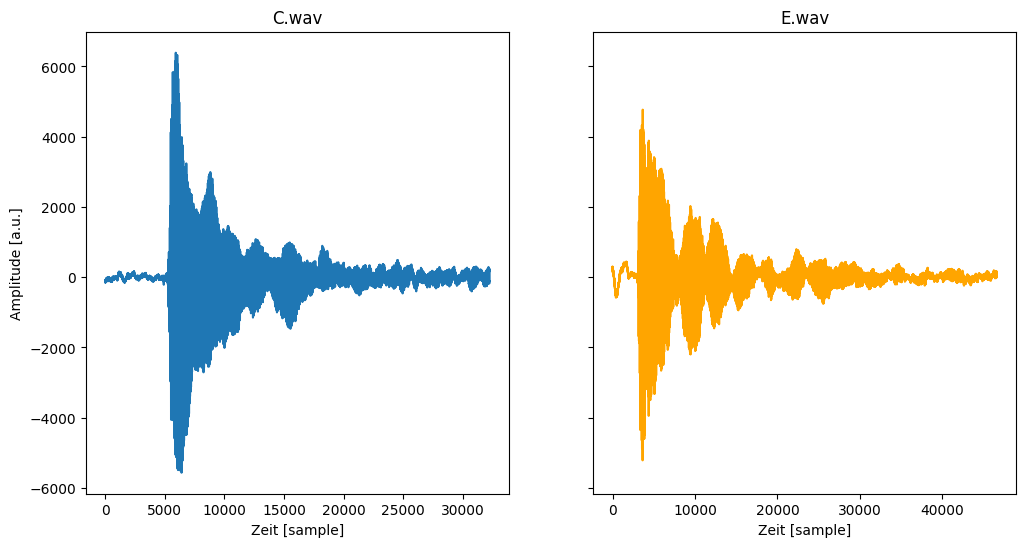

In [16]:
rate, data1 = io.wavfile.read("C.wav")
_   , data2 = io.wavfile.read("E.wav")

fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True,figsize=[12, 6])

ax1.plot(data1)
ax1.set_xlabel("Zeit [sample]")
ax1.set_ylabel("Amplitude [a.u.]")
ax1.set_title("C.wav")

ax2.plot(data2,color='orange')
ax2.set_xlabel("Zeit [sample]")
ax2.set_title("E.wav")

plt.show()

In [ ]:
Y1naive = myDFT(data1)

In [7]:
%%time 
Y1    = np.fft.fft(data1)
Y2    = np.fft.fft(data2)

CPU times: user 4.53 ms, sys: 312 µs, total: 4.84 ms
Wall time: 3.49 ms


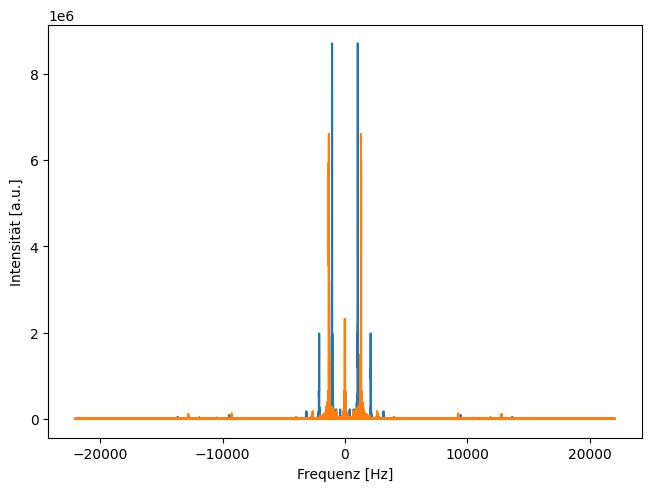

In [32]:
fig, ax = plt.subplots(constrained_layout=True)
freq1 = np.fft.fftfreq(len(data1), 1.0/rate)
freq2 = np.fft.fftfreq(len(data2), 1.0/rate)
ax.plot(freq1, np.abs(Y1))
ax.plot(freq2, np.abs(Y2))

plt.xlabel("Frequenz [Hz]")
plt.ylabel("Intensität [a.u.]")
plt.show()

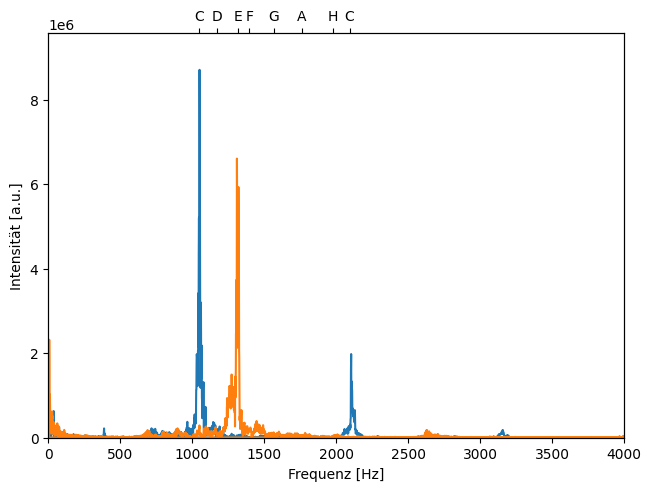

In [33]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(freq1, np.abs(Y1))
ax.plot(freq2, np.abs(Y2))
plt.xlabel("Frequenz [Hz]")
plt.ylabel("Intensität [a.u.]")
plt.axis([0, 4E+3, 0, 1.1*np.max(np.abs(Y1))])

ax2 = ax.twiny()
ax2.set_xticks([880*pow(2,1/12)**i for i in [3,5,7,8,10,12,14,15]])
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels(["C","D","E","F","G","A","H","C"])

plt.show()

<br><br><br><br><br><br>
****
### Zusatz: Demonstration von Zero-Padding und Fensterfunktionen 

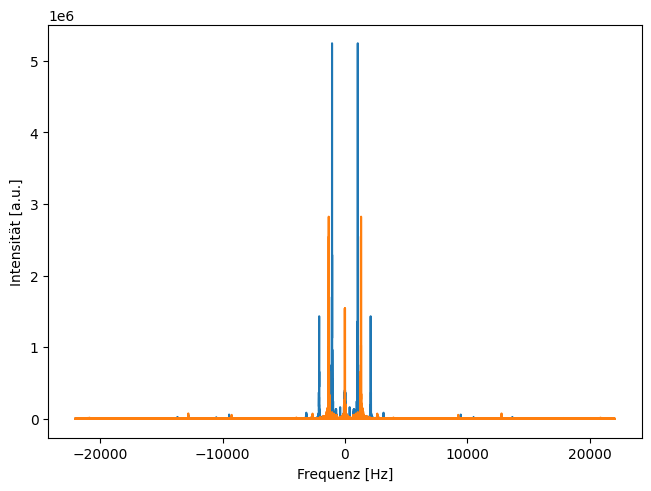

In [7]:
from scipy.signal.windows import hamming
N1 = len(data1)
N2 = len(data2)

# Wichte das Eingangssignal mit Hamming-Fensterfkt.
# und füge 2N Nullen an vor der FFT
Y1w = np.fft.fft(hamming(N1)*data1,3*N1)
Y2w = np.fft.fft(hamming(N2)*data2,3*N2)

fig, ax = plt.subplots(constrained_layout=True)
freq1w = np.fft.fftfreq(len(Y1w), 1.0/rate)
freq2w = np.fft.fftfreq(len(Y2w), 1.0/rate)
ax.plot(freq1w, np.abs(Y1w))
ax.plot(freq2w, np.abs(Y2w))

plt.xlabel("Frequenz [Hz]")
plt.ylabel("Intensität [a.u.]")
plt.show()